# Tasks Notebook

### **Import libraries** 

In [135]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


### **Task 1: Create Directory Structure**

In GitHub Codespaces using the terminal command line:

1. Navigate to the root of the repository: 
    ```bash
   cd /workspaces/computer-infrastructure-assessment
   
2. Create a `data` directory with two subdirectories: `timestamps` and `weather`:
    ```bash
   mkdir -p data/timestamps data/weather


### **Task 2: Timestamps**

1. Navigate to the `data/timestamps` directory:
   ```bash
    cd data/timestamps
   
2. Use the `date` command to output the current date and time to a text file named `now.txt`:
   ```bash
   date >> now.txt
   
3. Repeat this 10 times by creating a for loop that appends to the file rather than overwriting it:
   ```bash
   for i in {1..10}; do date >> now.txt; done
   
4. Use the `cat` command to read and verify the contents of `now.txt`:
   ```bash
   cat now.txt

[Reference: 'Date' command in Linux](https://www.geeksforgeeks.org/date-command-linux-examples/t)<br/>
[Reference: Write current date/time to a file](https://stackoverflow.com/questions/43221469/write-current-date-time-to-a-file-using-shell-script)<br/>
[Reference: Run date command a number of times in Linux](https://www.cyberciti.biz/faq/bsd-appleosx-linux-bash-shell-run-command-n-times/)

### **Task 3: Formatting Timestamps**

1. From Task 2, we are still in the `data/timestamps` directory.

   
2. Use the `date` command with the desired format to print the current date and time:
   ```bash
   date +"%Y%m%d_%H%M%S"`
   
3. Use the command from step 2 with the `>>` operator to append the output into a file named `formatted.txt`:
   ```bash
   date +"%Y%m%d_%H%M%S" >> formatted.txt`
   
4. Use the `cat` command to read and verify the contents of `formatted.txt`:
   ```bash
   cat formatted.txt`

[Reference: Date formatting in Linux](https://phoenixnap.com/kb/linux-date-command)


### **Task 4: Create Timestamped Files**

1. Ensure you are in the `data/timestamps` directory from Task 3.

2. Use the `touch` command combined with the `date` command to create an empty file named with the current date and timestamp in the format `YYYYmmdd_HHMMSS`:
   ```bash
   touch $(date +%Y%m%d_%H%M%S).txt

[Reference: How to create a file with today's date in the filename](https://stackoverflow.com/questions/48270960/how-to-create-a-file-with-todays-date-in-the-filename) <br/>
[Reference: How to create a file with today's date in the filename (2)](https://superuser.com/questions/399475/in-linux-how-to-make-a-file-with-a-name-that-is-current-date-and-time)<br/>

### **Task 5: Download Today's Weather Data**

1. Navigate to the `weather` directory:
    ```bash
   cd data/weather
   
2. Use the `wget` command to download the file from the web. Use the `-O` option to name the file where the data will be saved:
   ```bash
   wget -O weather.json https://prodapi.metweb.ie/observations/athenry/today

3. Verify that the file has been created:
   ```bash
    ls

[Reference: Use wget to download and name file](https://stackoverflow.com/questions/16678487/how-to-change-filename-of-a-file-downloaded-with-wget)

### **Task 6: Timestamp the Data**

1. From Task 5, we are still in the `data/weather` directory.
   
2. Modify the command from Task 5 to name the JSON file with today’s date and timestamp:
   ```bash
   wget -O $(date +%Y%m%d_%H%M%S).json https://prodapi.metweb.ie/observations/athenry/today

3. Verify that the file has been created:
   ```bash
   ls


### **Task 7: Write the Script**

1. Navigate to the root of the repository:
   ```bash
     cd /workspaces/computer-infrastructure-assessment
     
2. Use `nano` to create the script:
   ```bash
     nano weather.sh
     
3. In the `nano` editor, write the following code to create the script:

   ```bash
     #!/bin/bash
     
     [Indicates that the script should be run in the Bash shell]

   
     wget -O data/weather/`date +%Y%m%d_%H%M%S`.json https://prodapi.metweb.ie/observations/athenry/today
     
     [Changes to the `data/weather` directory then downloads and saves the weather data there in a timestamped file]

   
     echo "Downloaded weather data:"
     
     [Prints a message to confirm the file has been downloaded]

4. Save and exit `nano` then use the `chmod` command to make the script executable to user:
   ```bash
     chmod u+x weather.sh
     
5. Run the script:
   ```bash
     ./weather.sh
     
6. Navigate to the `data/weather` directory to check that the script has created the file:
   ```bash
     cd data/weather
     
[Reference: Create shell script in nano](https://www.linuxandubuntu.com/home/how-to-create-shell-scripts/)<br/>
[Reference: How to Make Script Executable in Linux | chmod Command](https://www.linuxandubuntu.com/home/how-to-create-shell-scripts/)<br/>
[Reference: How to execute a shell script in Linux](https://www.cyberciti.biz/faq/how-to-execute-a-shell-script-in-linux/)<br/>


----

### **Task 9: Data Analysis with Pandas**

#### **Import weather data**

In [136]:
# Load the JSON file into a DataFrame
df = pd.read_json('data/weather/20241031_213107.json')


[Reference:How to Read JSON Files with Pandas?](https://www.geeksforgeeks.org/how-to-read-json-files-with-pandas/)<br/>

#### **DataFrame Analysis and Cleaning**

In [137]:
# Preview the first few rows of data
df.head()

,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date,reportTime
0,Athenry,11,15n,Fog / Mist,"""Mist""",9,-,SW,225,97,0.0,1028,Thursday,2024-10-31,00:00
1,Athenry,11,15n,Fog / Mist,"""Mist""",9,-,S,180,98,0.1,1028,Thursday,2024-10-31,01:00
2,Athenry,11,15n,Fog / Mist,"""Mist""",9,-,S,180,97,0.0,1028,Thursday,2024-10-31,02:00
3,Athenry,10,15n,Fog / Mist,"""Mist""",11,-,S,180,97,0.0,1027,Thursday,2024-10-31,03:00
4,Athenry,10,15n,Fog / Mist,"""Mist""",13,-,SW,225,98,0.1,1027,Thursday,2024-10-31,04:00


In [138]:
total_rows = len(df)
print(f"Total number of rows: {total_rows}")

Total number of rows: 22


In [139]:
# Opt into future behavior for downcasting as error was recieved for downcasting behaviour for 'replace' being deprecated in future.
pd.set_option('future.no_silent_downcasting', True)

# Replace blank, whitespace-only fields, and '-' with np.nan
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)  # Handle blank or whitespace-only
df.replace('-', np.nan, inplace=True)  # Replace '-' specifically

# Count total rows and missing values by column
total_rows = len(df)
missing_data = df.isnull().sum()

# Display the results
print(f"Total number of rows: {total_rows}")
print("Columns with missing values:")
print(missing_data[missing_data > 0])


Total number of rows: 22
Columns with missing values:
windGust    22
dtype: int64


[Reference: Replace values in Pandas dataframe using regex](https://www.geeksforgeeks.org/replace-values-in-pandas-dataframe-using-regex/)<br/>
[Reference: Pandas: How to Replace Zero with NaN](https://www.statology.org/pandas-replace-0-with-nan/)<br/>
[Reference: A Guide to R Regular Expressions](https://www.datacamp.com/tutorial/regex-r-regular-expressions-guide) <br/>
[Reference: Using isnull() and groupby() on a pandas dataframe](https://stackoverflow.com/questions/46106954/using-isnull-and-groupby-on-a-pandas-dataframe)<br/>
[Reference: Display rows with one or more NaN values in pandas dataframe](https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe)<br/>
[Reference: pd.NA vs np.nan for pandas](https://stackoverflow.com/questions/60115806/pd-na-vs-np-nan-for-pandas)<br/>
[Reference: Replace values in Pandas dataframe using regex](https://www.geeksforgeeks.org/replace-values-in-pandas-dataframe-using-regex/)<br/>
[Reference: How to solve pandas (2.2.0) "FutureWarning: Downcasting behavior in replace is deprecated".](https://github.com/pandas-dev/pandas/issues/57734)<br/>

#### **Data Cleaning Findings**

- The dataset contains **22 rows** and **15 columns**.  
- Missing values were found in the `windGust` column, with all entries missing.  
- Placeholder values (`-` and blank fields) were replaced with `NaN`.  
- Data types were validated, ensuring numeric and datetime fields were correctly formatted.  
- All other columns were complete and ready for analysis.

In [140]:
# Generate summary statistics for numerical columns
df.describe()

,temperature,windSpeed,windDirection,humidity,rainfall,pressure,date
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22
mean,10.545455,10.090909,214.772727,97.045455,0.063636,1026.409091,2024-10-31 00:00:00
min,10.000000,7.000000,180.000000,94.000000,0.000000,1024.000000,2024-10-31 00:00:00
25%,10.000000,9.000000,225.000000,97.000000,0.000000,1025.250000,2024-10-31 00:00:00
50%,10.000000,11.000000,225.000000,97.000000,0.100000,1027.000000,2024-10-31 00:00:00
75%,11.000000,11.000000,225.000000,98.000000,0.100000,1027.000000,2024-10-31 00:00:00
max,12.000000,13.000000,225.000000,99.000000,0.200000,1028.000000,2024-10-31 00:00:00
std,0.670982,1.715728,19.301941,1.252703,0.065795,1.140555,NaN


#### **Weather Description Trends Throughout the Day**

In [141]:
# Frequency of each weather description
description_counts = df['weatherDescription'].value_counts()
print(description_counts)

weatherDescription
Fog / Mist      15
Cloudy           3
Rain showers     2
Light rain       2
Name: count, dtype: int64


[Reference:Pandas Index.value_counts()](https://www.geeksforgeeks.org/python-pandas-index-value_counts/)<br/>

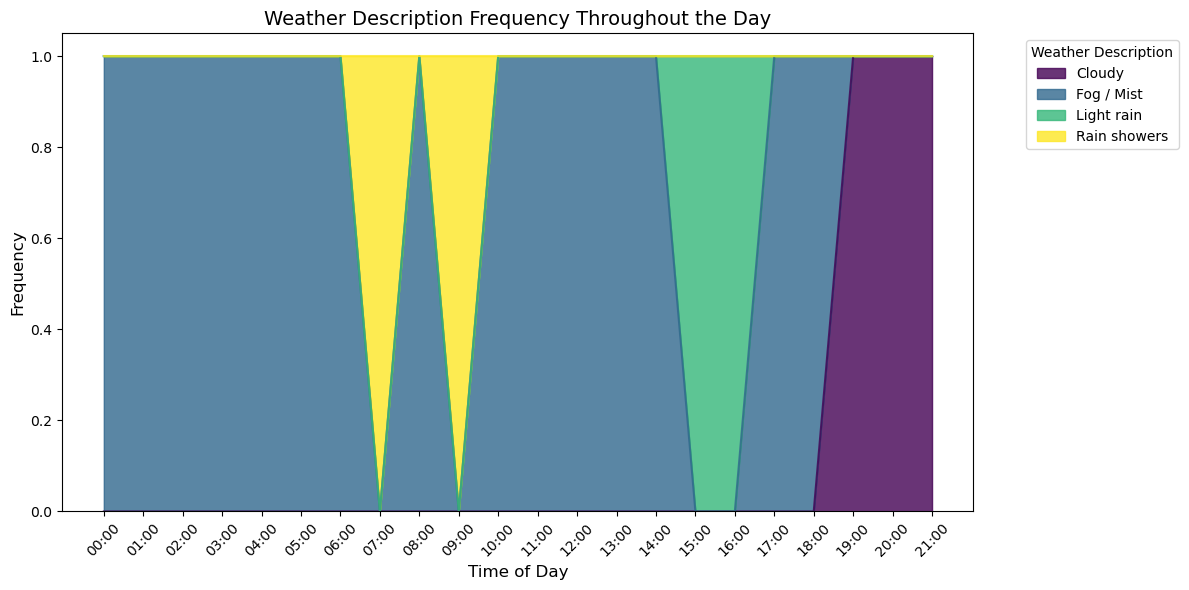

In [142]:
# Group the data by reportTime and weatherDescription, and count occurrences
weather_counts = df.groupby(['reportTime', 'weatherDescription']).size().unstack(fill_value=0)

# Plotting the data as a stacked area chart
weather_counts.plot.area(stacked=True, figsize=(12, 6), colormap='viridis', alpha=0.8)
plt.title("Weather Description Frequency Throughout the Day", fontsize=14)
plt.xlabel("Time of Day", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(ticks=range(len(weather_counts.index)), labels=weather_counts.index, rotation=45, fontsize=10)
plt.legend(title="Weather Description", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()



[Reference: Pandas – Groupby value counts on the DataFrame](https://www.geeksforgeeks.org/pandas-groupby-value-counts-on-the-dataframe/)<br/> 
[Reference: How to Plot a Pandas DataFrame with Matplotlib [Area Plot]](https://www.geeksforgeeks.org/pandas-groupby-value-counts-on-the-dataframe/)<br/> 
[Reference: How to Customize Matplotlib Xticks Frequency: A Comprehensive Guide](https://how2matplotlib.com/matplotlib-xticks-frequency.html)<br/> 
[Reference: Pandas DataFrame index Property](https://www.w3schools.com/python/pandas/ref_df_index.asp#:~:text=The%20index%20property%20returns%20the,%2C%20stop%2C%20and%20step%20values.)<br/> 
[Reference: How to use range(len()) in Python?](https://blog.finxter.com/how-to-use-rangelen-in-python/)<br/> 

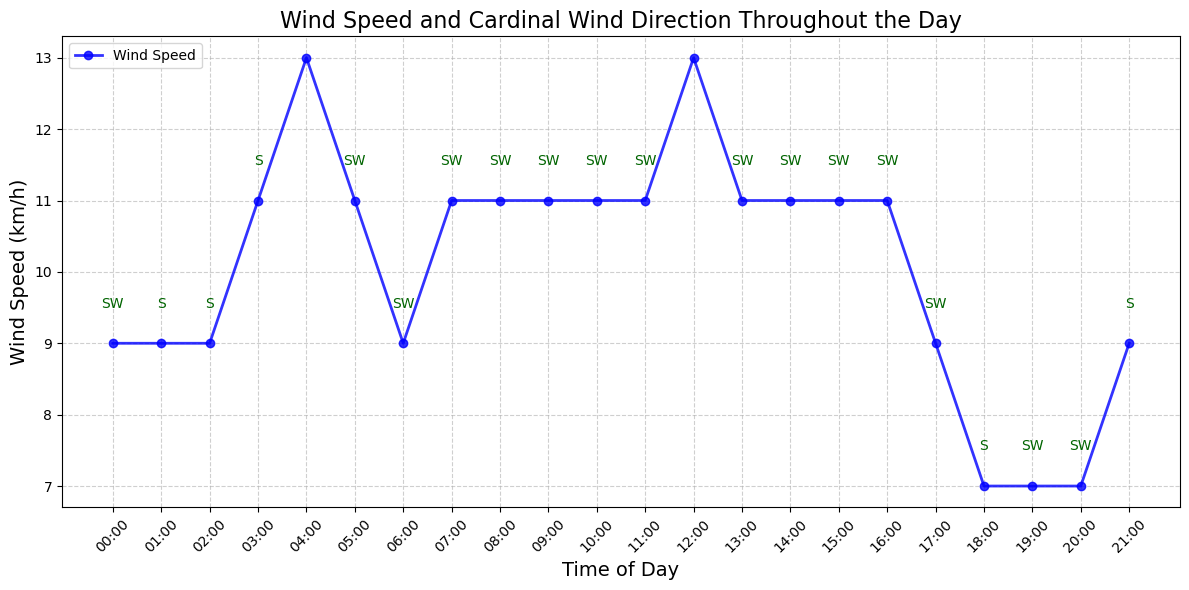

In [143]:
# Create the plot for wind speed
plt.figure(figsize=(12, 6))
plt.plot(df["reportTime"], df["windSpeed"], marker="o", linestyle="-", linewidth=2, alpha=0.8, color='blue', label="Wind Speed")
plt.title("Wind Speed and Cardinal Wind Direction Throughout the Day", fontsize=16)
plt.xlabel("Time of Day", fontsize=14)
plt.ylabel("Wind Speed (km/h)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

for time, speed, direction in zip(df["reportTime"], df["windSpeed"], df["cardinalWindDirection"]):
    plt.annotate(direction, (time, speed + 0.5), fontsize=10, ha='center', color='darkgreen')

plt.legend(loc="upper left", fontsize=10)
plt.tight_layout()
plt.show()



## Summary and Insights

### Data Structure
- The dataset contains **22 rows** and **15 columns**.
- Each row represents a single weather observation at a specific timestamp.
### Data Completeness
- No missing values in any columns.
### Key Columns
- **Name**: Station name (Athenry).
- **Dry Bulb Temperature**: Temperature in whole degrees Celsius.
- **Weather Description**: Text description of the weather conditions.
- **Wind Speed**: Wind speed in knots (kt).
- **Cardinal Wind Direction**: Wind direction in cardinal form.
- **Relative Humidity**: Humidity as a percentage.
- **Rainfall**: Precipitation amount in millimeters (mm).
- **Pressure**: Mean sea level pressure in millibars (mbar).
- **Day Name**: The day of the week for the observation.
- **Date**: Date of the observation.
- **Time of Observation**: Local time when the observation was recorded.

[Reference: Description of metrics deom Met Eireann](https://data.gov.ie/dataset/todays-weather-athenry/resource/fffca98d-f3b6-47de-a834-837f0633e14b)

## Daily Weather Summary for 2024-10-31 at Athenry Station

- **Temperature**: Cool and steady, averaging 10.5°C, with a range from 10°C to 12°C.
- **Weather Description**: Mostly "Fog / Mist" throughout the day, with some periods of light rain and showers.
- **Wind**: Gentle, averaging 10 km/h, primarily from the south to southwest.
- **Humidity**: Very high, averaging 97%, consistent with the frequent "fog and mist" conditions.
- **Rainfall**: Minimal, with a maximum of 0.2 mm and an average of 0.06 mm.

### Overall
A cool, humid day with consistent south-southwest winds, frequent fog or mist, and very light, intermittent precipitation.


## Potential Future Analysis
- Trend analysis over the day, such as changes in temperature or humidity.
- Correlation analysis, such as between wind speed and temperature changes.